# 分类准确度的问题
一个癌症预测系统，输入体检信息，可以判断是否有癌症  
我们的模型预测准确度：99.9%  
如果癌症的产生的概率只有0.1%  
我们的系模型只要预测所有人都是健康的，即可达到99.9%的准确度  

这种情况发生在极度偏斜的数据上  
只使用分类准确度是远远不够的

# 使用混淆矩阵做进一步分析
Confusion Matrix  
对于二分类问题  
为2\*2的矩阵  

![](混淆矩阵.png)

## 作业：填空
答案：  
TN  FP  
FN  TP

![](精准率.png)
精准率 ：precision = TP / （TP + FP）在预测数据上，我们的预测准确率  
召回率 ：recall = TP / (TP + FN) 在真实数据上，预测的准确率  

![](精准率和召回率可视化.png)

例：在10000个人中，我们预测所有人都是健康的  
9990 0  
10   0
分类准确度：99.9%  
精准率：nan  
召回率：0  
在及其有偏的数据中，精准率和召回率更有意义

# 实现混淆矩阵，精准率和召回率

In [3]:
import numpy as np
from sklearn import datasets

In [5]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 构造极度偏斜的数据
y[digits.target==9] = 1
y[digits.target!=9] = 0

In [7]:
# 使用逻辑回归算法
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test,y_test)

D:\Tool\Ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [9]:
y_predict = log_reg.predict(X_test)

In [13]:
# 精准率
TN_FN = len(y_predict[y_predict == 0])
TP_FP = len(y_predict[y_predict == 1])

TN_FP = len(y_test[y_test == 0])
FN_TP = len(y_test[y_test == 1])

In [22]:
y_predict_0 = y_predict == 0
y_predict_1 = y_predict == 1

y_test_0 = y_test == 0
y_test_1 = y_test == 1

In [25]:
TN = 0
FN = 0
TP = 0
FP = 0
for i,j in zip(y_predict_0,y_test_0):
    if i & j:
        TN += 1
        
for i,j in zip(y_predict_1,y_test_1):
    if i & j:
        TP += 1

In [26]:
FN = TN_FN - TN
FP = TP_FP - TP

In [27]:
precison = TP / (TP + FP)
precison

0.9473684210526315

In [29]:
recall = TP / (TP + FN)
recall

0.8

# 老师的解法

In [38]:
def TN(y_true, y_predict):
    return np.sum((y_true == 0) & (y_predict==0))

In [39]:
def FP(y_true, y_predict):
    return np.sum((y_true == 0) & (y_predict==1))

In [40]:
def FN(y_true, y_predict):
    return np.sum((y_true == 1) & (y_predict==0))

In [41]:
def TP(y_true, y_predict):
    return np.sum((y_true == 1) & (y_predict==1))

In [42]:
precison = TP(y_test,y_predict) / (TP(y_test,y_predict) + FP(y_test,y_predict))

In [43]:
precison

0.9473684210526315

In [44]:
def confusion_matrix(y_true,y_predict):
    return np.array([
        [TN(y_true,y_predict),FP(y_true,y_predict)],
        [FN(y_true,y_predict),TP(y_true,y_predict)]
    ])

In [45]:
confusion_matrix(y_test,y_predict)

array([[403,   2],
       [  9,  36]])

In [48]:
def precision_score(y_true,y_predict):
    tp = TP(y_true,y_predict)
    fp = FP(y_true,y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0

precision_score(y_test,y_predict)

0.9473684210526315

In [50]:
def recall_score(y_true,y_predict):
    tp = TP(y_true,y_predict)
    fn = FN(y_true,y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0

recall_score(y_test,y_predict)

0.8

# 调用sklearn中的方法

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [52]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predict)

0.9473684210526315

In [53]:
from sklearn.metrics import recall_score
recall_score(y_test,y_predict)

0.8

# 10.4如何解读这两个标准呢？

对于具体场景，有不同的标准  
- 精准率：对于所有预测为1的情况，哪些预测对了。例如: 股票涨跌预测，尝试分析一下为啥？
- 召回率：对于所有真实为1的情况下。例如：判断一个人是否患病，尝试分析一下为啥？

# 精准率和召回率二者兼顾： F1 Score
F1 Score是precision 和 recall的调和平均值
$$\frac{1}{F 1}=\frac{1}{2}\left(\frac{1}{\text {precision}}+\frac{1}{\text {recall}}\right)$$
$$F 1=\frac{2 \cdot \text {precision } \cdot \text {recall}}{\text {precision }+\text {recall}}$$

In [54]:
def F1_score(precision, recall):
    try:
        return 2*precision*recall / (precision+recall)
    except:
        return 0.0

In [55]:
precison = 0.5
recall = 0.5
F1_score(precison,recall)

0.5

In [56]:
precison = 0.1
recall = 0.9
F1_score(precison,recall)

0.18000000000000002

In [57]:
precison = 0.0
recall = 1.0
F1_score(precison,recall)

0.0

In [60]:
# precision = precision_score(y_test,y_predict)
# recall = recall_score(y_test,y_predict)

from sklearn.metrics import f1_score
f1_score(y_test,y_predict)

0.8674698795180723

# 10.5Precision-Recall的平衡

![](精准率和召回率平衡.png)
![](精准率和召回率平衡1.png)
![](精准率和召回率平衡2.png)
由上图可得，精准率和召回率是相互制衡的。

In [61]:
confusion_matrix(y_test,y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [62]:
f1_score(y_test,y_predict)

0.8674698795180723

In [64]:
log_reg.decision_function(X_test)# 即上述的Score值

array([-22.05700117, -33.02940957, -16.21334087, -80.3791447 ,
       -48.25125396, -24.54005629, -44.39168773, -25.04292757,
        -0.97829292, -19.7174399 , -66.25139191, -51.09600903,
       -31.49348767, -46.05335761, -38.67875653, -29.80471251,
       -37.58849546, -82.57569732, -37.81903096, -11.01165509,
        -9.17439784, -85.13004331, -16.71617974, -46.23725224,
        -5.32992784, -47.91762441, -11.66729524, -39.1960157 ,
       -25.25293243, -14.3664722 , -16.99783066, -28.91904826,
       -34.33940562, -29.47603768,  -7.85812845,  -3.82094912,
       -24.08161558, -22.16362592, -33.61218699, -23.14023293,
       -26.9180406 , -62.3893701 , -38.85690022, -66.77259733,
       -20.14482853, -17.47886658, -18.06799819, -22.22224569,
       -29.62302848, -19.73171824,   1.49552053,   8.32079827,
       -36.29307324, -42.50732725, -25.90460192, -34.98959422,
        -8.42010631, -50.04725431, -51.48208247,  19.88958588,
        -8.91888462, -31.99343636, -11.66099193,  -0.47

In [65]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
decision_score = log_reg.decision_function(X_test)# 即上述的Score值

In [68]:
np.min(decision_score)

-85.68608522646575

In [69]:
np.max(decision_score)

19.8895858799022

In [72]:
y_predict_2 = np.array(decision_score>=5,dtype='int')

In [73]:
confusion_matrix(y_test,y_predict_2)

array([[404,   1],
       [ 21,  24]], dtype=int64)

In [74]:
precision_score(y_test,y_predict_2)

0.96

In [75]:
recall_score(y_test,y_predict_2)

0.5333333333333333

In [76]:
f1_score(y_test,y_predict_2)

0.6857142857142858

In [77]:
y_predict_3 = np.array(decision_score>=-5,dtype='int')

In [78]:
confusion_matrix(y_test,y_predict_3)

array([[390,  15],
       [  5,  40]], dtype=int64)

In [79]:
precision_score(y_test,y_predict_3)

0.7272727272727273

In [80]:
recall_score(y_test,y_predict_3)

0.8888888888888888

In [81]:
f1_score(y_test,y_predict_3)

0.7999999999999999

# 10.6precision和recall曲线

In [83]:
precisions = []
recalls = []
thresholds = np.arange(np.min(decision_score),np.max(decision_score),0.1)

for th in thresholds:
    y_predict = np.array(decision_score>=th,dtype='int')
    precisions.append(precision_score(y_test,y_predict))
    recalls.append(recall_score(y_test,y_predict))
    

In [86]:
import matplotlib.pyplot as plt

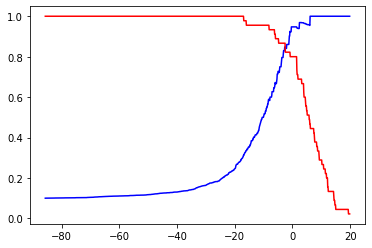

In [88]:
plt.plot(thresholds,precisions,color='b')
plt.plot(thresholds,recalls,color='r')
plt.show()

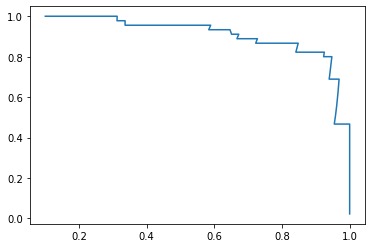

In [89]:
plt.plot(precisions,recalls)
plt.show()

In [90]:
from sklearn.metrics import precision_recall_curve

# 第二个参数即score
precisions,recalls,thresholds = precision_recall_curve(y_test,decision_score)

In [92]:
precisions.shape

(145,)

In [93]:
thresholds.shape

(144,)

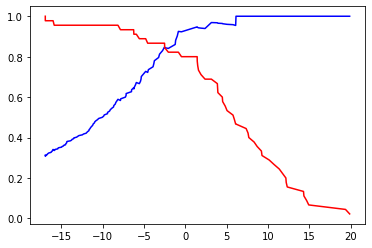

In [94]:
plt.plot(thresholds,precisions[:-1],color='b')
plt.plot(thresholds,recalls[:-1],color='r')
plt.show()

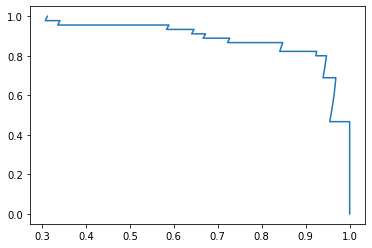

In [96]:
plt.plot(precisions,recalls)
plt.show()

precision-recall曲线可以用作选择模型来看模型好坏

# 10.7ROC曲线

Receiver Operation Characteristic Curve  
描述TPR和FPR之间的关系  
TPR = Recall，即TP/（TP+FN）
FPR = FP/（TN+FP）
![](TPR与FPR.png)
![](TPR与FPR计算例子.png)

In [98]:
from sklearn.metrics import roc_curve

#thresholds = np.arange(np.min(decision_score),np.max(decision_score),0.1)

fprs,tprs,thresholds = roc_curve(y_test,decision_score)

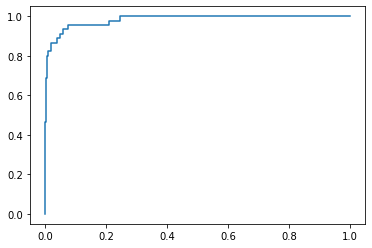

In [99]:
plt.plot(fprs,tprs)
plt.show()

通常关注的是曲线与X轴的面积大小，面积越大，模型越好。

In [100]:
from sklearn.metrics import roc_auc_score
"""
这里的auc意思为area under curve
"""
roc_auc_score(y_test,decision_score)

0.9830452674897119

![](ROC曲线.png)
选择面积大的模型！

# 10.8多分类问题

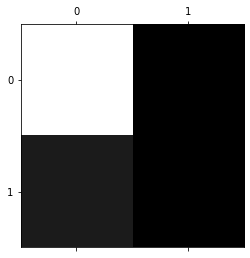

In [102]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test,y_predict)
"""
matshow意为matrix show
cmap意为color map，颜色映射
"""
plt.matshow(cfm,cmap=plt.cm.gray)
plt.show()

In [103]:
row_sums = np.sum(cfm,axis=1)
err_matrix = cfm/row_sums
np.fill_diagonal(err_matrix,0)
err_matrix

array([[0.        , 0.        ],
       [0.10864198, 0.        ]])

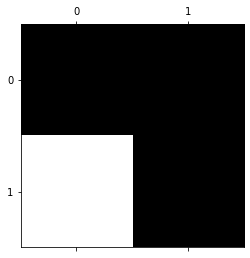

In [104]:
plt.matshow(err_matrix,cmap=plt.cm.gray)
plt.show()
# 越亮表示错误的地方

我们只调节算法的参数，一定要注意原来的数据是否有问题！